<a href="https://colab.research.google.com/github/Storm00212/Electromagnetics/blob/main/Wave_equation_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
# Parameters
wavelength = 2.0          # Wavelength λ
k = 2 * np.pi / wavelength  # Wave number β = 2π/λ
omega = 2 * np.pi         # Angular frequency ω (period = 1)
c = omega / k             # Speed c = ω/k (here c = 1 in normalized units)

# Spatial grid along propagation direction (z)
z = np.linspace(-5, 5, 400)

# Animation settings
frames = 200
t_max = 2.0               # Animate over 2 full periods

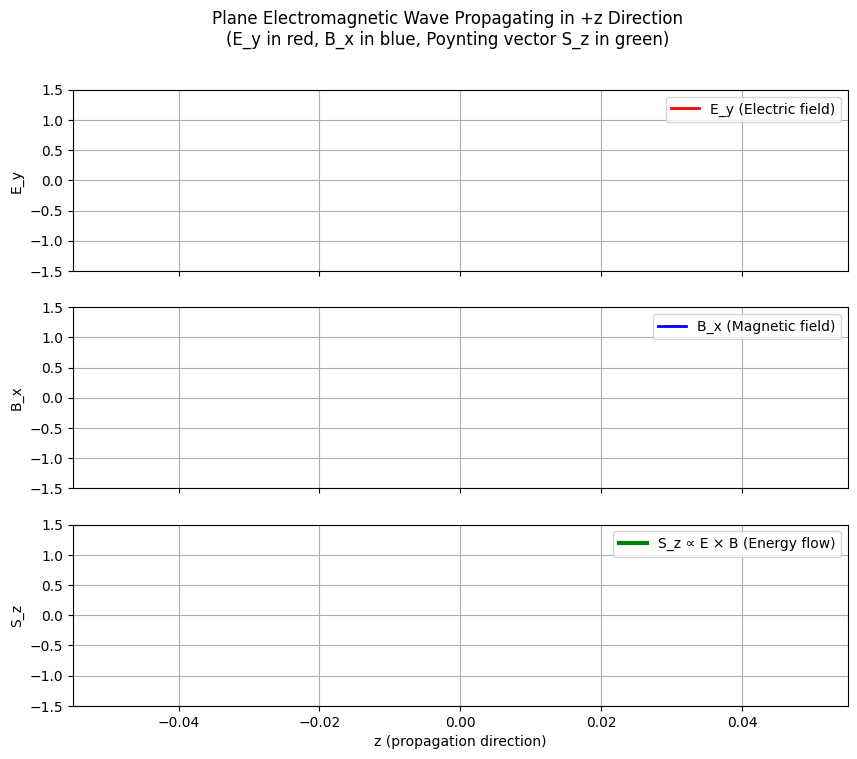

In [5]:
# Set up the figure
fig, ax = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
fig.suptitle('Plane Electromagnetic Wave Propagating in +z Direction\n'
             '(E_y in red, B_x in blue, Poynting vector S_z in green)')

# Initialize plot lines
line_E, = ax[0].plot([], [], 'r-', lw=2, label='E_y (Electric field)')
line_B, = ax[1].plot([], [], 'b-', lw=2, label='B_x (Magnetic field)')
line_S, = ax[2].plot([], [], 'g-', lw=3, label='S_z ∝ E × B (Energy flow)')

ax[0].set_ylabel('E_y')
ax[1].set_ylabel('B_x')
ax[2].set_ylabel('S_z')
ax[2].set_xlabel('z (propagation direction)')
for a in ax:
    a.grid(True)
    a.legend(loc='upper right')
    a.set_ylim(-1.5, 1.5)

In [6]:
# Update function for each frame
def update(frame):
    t = t_max * frame / frames

    # Phase for a wave traveling in +z: ωt - kz
    phase = omega * t - k * z

    # Fields (sinusoidal, in phase)
    E_y = np.sin(phase)
    B_x = (1 / c) * np.sin(phase)   # |B| = |E|/c
    S_z = E_y * B_x                 # Instantaneous Poynting vector component

    line_E.set_data(z, E_y)
    line_B.set_data(z, B_x)
    line_S.set_data(z, S_z)

    ax[0].set_title(f'Time t = {t:.2f}  |  Speed c = {c:.2f}  |  Wavelength λ = {wavelength}')

    return line_E, line_B, line_S

In [7]:
# Create and display the animation
ani = FuncAnimation(fig, update, frames=frames, interval=50, blit=True)

HTML(ani.to_html5_video())

# Attempting a 3 dimensional view

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

In [10]:
# Parameters
wavelength = 4.0                  # Wavelength (adjust for more/fewer cycles)
k = 2 * np.pi / wavelength        # Wave number
omega = 2 * np.pi                 # Angular frequency (period = 1 for smooth animation)
c = 1.0                           # Speed of light (normalized units)

# Grid along propagation direction (z-axis)
z = np.linspace(-10, 10, 30)      # 30 points for arrows (more = slower animation)

# Zero arrays for y and x directions (E along y, B along x)
y = np.zeros_like(z)
x = np.zeros_like(z)

# Amplitude scaling for nice arrow sizes
E_amp = 1.5
B_amp = E_amp / c                 # |B| = |E|/c